In [ ]:
#pip install open-ephys-python-tools
import open_ephys.analysis
from open_ephys.analysis import Session
import matplotlib.pyplot as plt
import datetime
import numpy as np
from pynwb import NWBHDF5IO, NWBFile, TimeSeries

## GET THE DATA FROM ANAOLOG NIDAQ INPUT 

In [2]:
directory="C:\\Users\\Ellen\\OneDrive - University of Massachusetts\\20220622_PersonalComp\\NPX\\EMR23006\\2023-10-09_17-09-09"
session=Session(directory)
recording = session.recordnodes[0].recordings[0]
data = recording.continuous[1].get_samples(start_sample_index=0, end_sample_index=-1)

# print(len(session.recordnodes)) #this will just be 1 unless multiple neuropixels are plugged in 
# print(session.__dir__())
# session.directory
# session.mmap_timestamps
# session.recordnodes[0].recordings[0].continuous[1] #this is where nidaq is

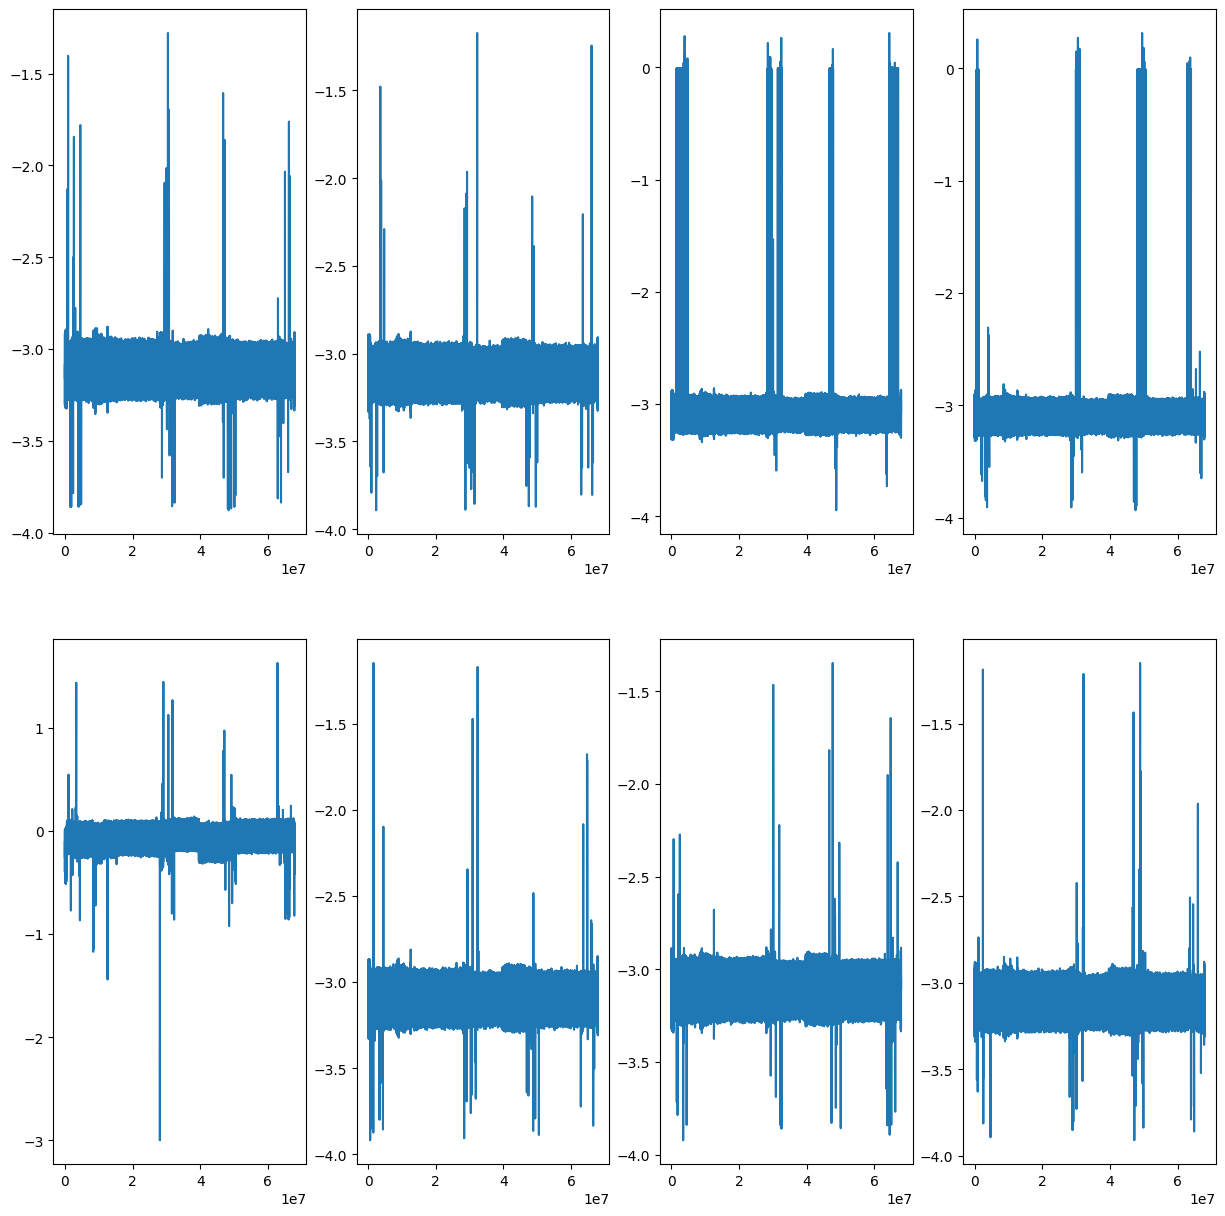

In [3]:
# # PLOT TO FIND THE CUTOFF
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2,4, figsize=(15,15))


ax[0,0].plot((range(len(data[:,1]))),data[:,0])
ax[0,1].plot((range(len(data[:,1]))),data[:,1])
ax[0,2].plot((range(len(data[:,1]))),data[:,2])
ax[0,3].plot((range(len(data[:,1]))),data[:,3])
ax[1,0].plot((range(len(data[:,1]))),data[:,4])
ax[1,1].plot((range(len(data[:,1]))),data[:,5])
ax[1,2].plot((range(len(data[:,1]))),data[:,6])
ax[1,3].plot((range(len(data[:,1]))),data[:,7])

plt.show()


#plt.plot(xlabel,data[:,1])

In [6]:
def findTS_greaterthancutoff(signal, cutoff, sample):
    TS_index = [ind for ind, ele in enumerate(signal) if ele >= cutoff] #10.6sec #TS_index = [i for i in range(len(signal)) if signal[i] >= -2] #13.3sec
    #TSevent=TS_index/sample
    #offset=list()
    onset=list()
    onset.append(TS_index[0])

    for i in range(len(TS_index)-1):
        if TS_index[i+1]-TS_index[i]>1:
            #offset.append(TS_index[i])
            onset.append(TS_index[i+1])
    
    #offset.append(TS_index[-1])
    #TSoffset=[x/sample for x in offset]
    TSonset=[x/sample for x in onset]

    return TSonset #, TSoffset

def findTS_lessthancutoff(signal, cutoff, sample):
    TS_index = [ind for ind, ele in enumerate(signal) if ele <= cutoff] #10.6sec #TS_index = [i for i in range(len(signal)) if signal[i] >= -2] #13.3sec
    #TSevent=TS_index/sample
    offset=list()
    onset=list()
    onset.append(TS_index[0])

    for i in range(len(TS_index)-1):
        if TS_index[i+1]-TS_index[i]>1:
            offset.append(TS_index[i])
            onset.append(TS_index[i+1])
    
    #offset.append(TS_index[-1])
    TSoffset=[x/sample for x in offset]
    TSonset=[x/sample for x in onset]

    return TSonset, TSoffset



## TS for AARS task

In [ ]:
## FIND TS FOR AARS TASK - GREATER THAN CUTOFF

#Set the variables for consistant across recordings - cutoff and sampling rate
cutoff=-.75
sample=30000

#event 0
signal=data[:,0]
npx_startStop = findTS_greaterthancutoff(signal,cutoff,sample)
npx_startTime=npx_startStop[0]
npx_stopTime=npx_startStop[-1]

#event 1
signal=data[:,1]
npx_lpApp = findTS_greaterthancutoff(signal,cutoff,sample)

#event 2
signal=data[:,2]
npx_lpAver = findTS_greaterthancutoff(signal,cutoff,sample)

#event 3
signal=data[:,3]
npx_noseIn = findTS_greaterthancutoff(signal,cutoff,sample)

#event 4
signal=data[:,4]
npx_shock = findTS_greaterthancutoff(signal,cutoff,sample)

#event 5
signal=data[:,5]
npx_toneApp = findTS_greaterthancutoff(signal,cutoff,sample)

#event 6
signal=data[:,6]
npx_toneAver = findTS_greaterthancutoff(signal,cutoff,sample)

#event 7
signal=data[:,7]
npx_toneNeut = findTS_greaterthancutoff(signal,cutoff,sample)

## TS for anes recording

In [28]:
## FIND TS FOR anes recording  - LESS THAN CUTOFF

#Set the variables for consistant across recordings - cutoff and sampling rate
cutoff=2
sample=30000

#event 0
signal=data[:,4]
npx_anesTSon, npx_anesTSoff = findTS_lessthancutoff(signal,cutoff,sample)


## TS for tonepip

In [7]:
## FIND TS FOR TONEPIP TASK - GREATER THAN CUTOFF

#Set the variables for consistant across recordings - cutoff and sampling rate
cutoff=-.75
sample=30000

# #event 0
# signal=data[:,0]
# npx_startStop = findTS_greaterthancutoff(signal,cutoff,sample)
# npx_startTime=npx_startStop[0]
# npx_stopTime=npx_startStop[-1]

# #event 1
# signal=data[:,1]
# npx_lpApp = findTS_greaterthancutoff(signal,cutoff,sample)

# #event 2
# signal=data[:,2]
# npx_lpAver = findTS_greaterthancutoff(signal,cutoff,sample)

# #event 3
# signal=data[:,3]
# npx_noseIn = findTS_greaterthancutoff(signal,cutoff,sample)

# #event 4
# signal=data[:,4]
# npx_shock = findTS_greaterthancutoff(signal,cutoff,sample)

# #event 5
# signal=data[:,5]
# npx_toneApp = findTS_greaterthancutoff(signal,cutoff,sample)

#event 6
signal=data[:,6]
npx_tone_4KHZ = findTS_greaterthancutoff(signal,cutoff,sample)

#event 7
signal=data[:,7]
npx_tone_12KHZ = findTS_greaterthancutoff(signal,cutoff,sample)

In [41]:
# npx_anesTSon.pop(6)

664.7172

## REGULAR PROG - USES NPX START AND MEDPC START TO FIND START AND STOP TIMES OF EACH TRIAL

In [ ]:
#To get time intervals for each trial for NWB
#tone on + 5 + RT + 5 + startTS
# so will count the 5s prior to RT and capture a little of response like the sucrose being delivered
#so start * tone on first then add RT and 10 for end 

#npx_startTrial=mpc_toneOnTS+ npx_startTime - mpc_intervalTime


npx_startTrial=[]
for i in range(len(mpc_toneOnTS)):
    npx_startTrial.append(float(mpc_toneOnTS[i]-mpc_intervalTimes[i]))

npx_startTrial=np.array(npx_startTrial)
npx_startTrial+=npx_startTime

npx_cueTime=mpc_toneOnTS+ npx_startTime

npx_stopTrial=[]
for i in range(len(npx_startTrial)):
    npx_stopTrial.append(float(npx_startTrial[i]+5+mpc_reactionTimes[i]))

npx_stopTrial=np.array(npx_stopTrial)
npx_stopTrial+=10





## tonepip TRIALS

In [10]:
#To get time intervals for each trial for NWB
#tone on + 5 + RT + 5 + startTS
# so will count the 5s prior to RT and capture a little of response like the sucrose being delivered
#so start * tone on first then add RT and 10 for end 

#npx_startTrial=mpc_toneOnTS+ npx_startTime - mpc_intervalTime


npx_startTrial=[]
for i in range(len(npx_tone_4KHZ)):
    npx_startTrial.append(float(mpc_toneOnTS[i]-mpc_intervalTimes[i]))

npx_startTrial=np.array(npx_startTrial)
npx_startTrial+=npx_startTime

npx_cueTime=mpc_toneOnTS+ npx_startTime

npx_stopTrial=[]
for i in range(len(npx_startTrial)):
    npx_stopTrial.append(float(npx_startTrial[i]+5+mpc_reactionTimes[i]))

npx_stopTrial=np.array(npx_stopTrial)
npx_stopTrial+=10





NameError: name 'mpc_toneOnTS' is not defined

## ADD BEHAVIOR TO THE NWB FILE 

In [ ]:
#use to add data to nwb file - specifically timestamps

import datetime
import numpy as np
from pynwb import NWBHDF5IO, NWBFile, TimeSeries



def addBehaviorTimes(filename, name, data, unit, timestamps):
    # open the NWB file in r+ mode
    with NWBHDF5IO(f"C:\\Users\\Ellen\\OneDrive - University of Massachusetts\\20220622_PersonalComp\\NPX\\NWBFiles\\{filename}.nwb", "r+") as io:
        read_nwbfile = io.read()

        # create a TimeSeries and add it to the file under the acquisition group
        test_ts = TimeSeries(
            name=name, 
            data=data, 
            unit=unit, 
            timestamps=timestamps
        )
        read_nwbfile.add_stimulus(test_ts)

        # write the modified NWB file
        io.write(read_nwbfile)
    io.close()



## ADD TRIALS IN NWB

In [ ]:
# confirm the file contains the new TimeSeries in acquisition
filename = 'EMR22009_20230327'
with NWBHDF5IO(f"C:\\Users\\Ellen\\OneDrive - University of Massachusetts\\20220622_PersonalComp\\NPX\\NWBFiles\\{filename}.nwb", "r+") as io:
    read_nwbfile = io.read()

    read_nwbfile.add_trial_column(name="cue", description="cue type for each trial in reinforcement task")
    read_nwbfile.add_trial_column(name="response", description="1=corr, 2=escape, 3=wrong, 4/5=neut response, 0=omission")
    read_nwbfile.add_trial_column(name="leverout_time", description="time levers are extended")
    read_nwbfile.add_trial_column(name="leverpress_time", description="time of leverpress")
    read_nwbfile.add_trial_column(name="cue_time", description="time of cue onset")

    for i in range(100):

        read_nwbfile.add_trial(
            start_time=float(npx_startTrial[i]),
            stop_time=float(npx_stopTrial[i]),
            cue=float(mpc_trialType[i]),
            response=float(mpc_trialResponse[i]),
            leverout_time=float((npx_startTrial[i])+5),
            leverpress_time=float(npx_startTrial[i]+5+mpc_reactionTimes[i]),
            cue_time=float(npx_cueTime[i])
            
            #, timeseries=[LPapp, LPaver, ToneApp, ToneAver, ToneNeutral, Shock, NoseIn ],
        )

    io.write(read_nwbfile)
    io.close()
    #print(read_nwbfile.acquisition)


In [55]:
# FOR ANES RECORDINGS 

filename = 'EMR22009_20230323'
jawlist= [1,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0]
footlist=[0,0,1,2,1,2,1,1,1,0,0,0,3,4,3,4,3]
clonlist=[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]

with NWBHDF5IO(f"C:\\Users\\Ellen\\OneDrive - University of Massachusetts\\20220622_PersonalComp\\NPX\\NWBFiles\\{filename}.nwb", "r+") as io:
    read_nwbfile = io.read()

    read_nwbfile.add_trial_column(name="jaw", description="0=no, 1=pre clon jaw movement, 2=post clon jaw movement")
    read_nwbfile.add_trial_column(name="footpinch", description="0 = no, 1= contra pre clon, 2= ipsi pre clon, 3= contra post clon, 4= ipsi post clon")
    read_nwbfile.add_trial_column(name="clon", description="time of clon injections")
 

    for i in range(len(npx_anesTSon)):

        read_nwbfile.add_trial(
            start_time=float(npx_anesTSon[i]),
            stop_time=float(npx_anesTSoff[i]),
            jaw=float(jawlist[i]),
            footpinch=float(footlist[i]),
            clon=float((clonlist[i])),
            
        )

    io.write(read_nwbfile)
    io.close()
    #print(read_nwbfile.acquisition)


In [12]:
# FOR ANES RECORDINGS 

filename = 'EMR23006_20231009'

trialList= np.append(mpc_preclon_toneType, 0) # HAVE TO MANUALLY INSERT A CLONIDINT TIMESTAMP IN TIMESTAMP 
trialList=np.append(trialList, mpc_clon10m_toneType)
trialList= np.append(trialList, mpc_clon20m_toneType)
trialList= np.append(trialList, mpc_clon30m_toneType)

clonlist=[]
for i in ((mpc_preclon_toneType)):
    clonlist.append(0)
clonlist.append(-1)
for i in ((mpc_clon10m_toneType)):
    clonlist.append(1)
for i in ((mpc_clon20m_toneType)):
    clonlist.append(2)
for i in ((mpc_clon30m_toneType)):
    clonlist.append(3)


timestamps=npx_tone_12KHZ + npx_tone_4KHZ 
timestamps.append(290) # HAVE TO MANUALLY INSERT A CLONIDINT TIMESTAMP IN TIMESTAMP 
timestamps.sort()

stoptime=[x+0.025 for x in timestamps]

with NWBHDF5IO(f"C:\\Users\\Ellen\\OneDrive - University of Massachusetts\\20220622_PersonalComp\\NPX\\NWBFiles\\{filename}.nwb", "r+") as io:
    read_nwbfile = io.read()

    read_nwbfile.add_trial_column(name="tone", description="0=clonidine, 4-4khz, 12=12khz")
    read_nwbfile.add_trial_column(name="clon", description="relative to clon; -1 = injection time est, 0=pre, 1=10m, 2=20m, 3=30m")
 

    for i in range(len(timestamps)):

        read_nwbfile.add_trial(
            start_time=float(timestamps[i]),
            stop_time=float(stoptime[i]),
            tone=float(trialList[i]),
            clon=float((clonlist[i])),
            
        )

    io.write(read_nwbfile)
    io.close()
    #print(read_nwbfile.acquisition)

In [13]:
# io.close()
# confirm the file contains the new TimeSeries in acquisition
filename = 'EMR23006_20231009'
with NWBHDF5IO(f"C:\\Users\\Ellen\\OneDrive - University of Massachusetts\\20220622_PersonalComp\\NPX\\NWBFiles\\{filename}.nwb", "r+") as io:
    read_nwbfile = io.read()
    trial=(read_nwbfile.trials)
    print(trial)
    

trials pynwb.epoch.TimeIntervals at 0x2411142190464
Fields:
  colnames: ['start_time' 'stop_time' 'tone' 'clon']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    tone <class 'hdmf.common.table.VectorData'>,
    clon <class 'hdmf.common.table.VectorData'>
  )
  description: experimental trials
  id: id <class 'hdmf.common.table.ElementIdentifiers'>



## ADD TIME INTERVALS - TRIALS - TO NWB

In [ ]:
from pynwb.epoch import TimeIntervals

# confirm the file contains the new TimeSeries in acquisition
with NWBHDF5IO(f"C:\\Users\\Ellen\\OneDrive - University of Massachusetts\\20220622_PersonalComp\\NPX\\NWBFiles\\{filename}.nwb", "r+") as io:
    read_nwbfile = io.read()


trial_intervals = TimeIntervals(
    name="trials",
    description="Intervals from tone onset to 5 sec after trial is over.",
)

trial_intervals.add_column(name="cue", description="1=app, 2=aver, 3=neut")
trial_intervals.add_column(name="response", description="1=corr, 2=escape, 3=wrong, 4/5=neut response, 0=omission")

for i in range(100):
    trial_intervals.add_row(
        start_time=float(npx_startTrial[i]),
        stop_time=float(npx_stopTrial[i]),
        cue=mpc_trialType[i],
        response=(mpc_trialResponse[i])
    )


read_nwbfile.add_time_intervals(trial_intervals)

print(read_nwbfile.intervals)
io.close()

In [ ]:
from pynwb.epoch import TimeIntervals
trial_intervals = TimeIntervals(
    name="trials",
    description="Intervals from tone onset to 5 sec after trial is over.",
)

trial_intervals.add_column(name="cue", description="1=app, 2=aver, 3=neut")
trial_intervals.add_column(name="response", description="1=corr, 2=escape, 3=wrong, 4/5=neut response, 0=omission")

for i in range(100):
    trial_intervals.add_row(
        start_time=float(npx_startTrial[i]),
        stop_time=float(npx_stopTrial[i]),
        cue=mpc_trialType[i],
        response=(mpc_trialResponse[i])
    )

In [ ]:
print(trial_intervals[0])

In [ ]:
from pynwb.epoch import TimeIntervals

import datetime
import numpy as np
from pynwb import NWBHDF5IO, NWBFile, TimeSeries


filename = 'EMR22009_20230327'

# confirm the file contains the new TimeSeries in acquisition
with NWBHDF5IO(f"C:\\Users\\Ellen\\OneDrive - University of Massachusetts\\20220622_PersonalComp\\NPX\\NWBFiles\\{filename}.nwb", "r+") as io:
    read_nwbfile = io.read()
    read_nwbfile.add_time_intervals(trial_intervals)
    print(read_nwbfile.intervals)
    io.close()

## GET TRIALS FROM NWB - SANITY CHECK

In [ ]:

trialsinfile= read_nwbfile.get_time_intervals("trials")
print(trialsinfile)

#_ = read_nwbfile.intervals
#_ = read_nwbfile.get_time_intervals("trials")

read_nwbfile.get_time_intervals("trials").to_dataframe()
trials_df=read_nwbfile.get_time_intervals("trials").to_dataframe()
trials_df.query("(cue == 2.0) & (response == 1.0)")
